<a href="https://colab.research.google.com/github/Iblouse/Type2Diabetes/blob/main/Data_Prep_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I: GATHERING DATA, PREPARING DATA, ANALYSE DATA

##### Type 2 Diabetes is one of the most prevalent chronic diseases in the US and all around the world. It puts a lot of financial burden on the US economy.
##### According to the [American Diabetes Association](https://www.diabetes.org/resources/statistics/cost-diabetes) "on March 22, 2018 estimating the total costs of diagnosed diabetes have risen to 327 billion dollars in 2017 from 245 billion dollars in 2012, when the cost was last examined."
##### The goal of this project is to develop predictive models to identify risk factors for type 2 diabetes, which could help facilitate early diagnosis and intervention and reduce medical costs. 
##### To do this project I will use the Behavioral Risk Factor Surveillance System dataset 2018 BRFSS from the CDC website.
#####  The link to the dataset is [here](https://www.cdc.gov/brfss/annual_data/annual_2018.html) or you can download it directly [LLCP2018XPT.zip](https://www.cdc.gov/brfss/annual_data/2018/files/LLCP2018XPT.zip).
##### The dataset is 437436 rows by 275 columns.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
import scipy.stats as stats

In [ ]:
# Reading the SAS Dataset
myDF = pd.read_sas('LLCP2018.XPT')

In [ ]:
myDF.head()

In [ ]:
# Checking the number of rows and columns
myDF.shape

#### Selecting the variables for the project

In [ ]:
myDiab=myDF[['DIABETE3', 'HLTHPLN1', '_AGEG5YR','CHECKUP1','DECIDE','_RFHLTH', 'SLEPTIM1', 'FLUSHOT6', 'EMPLOY1', 'ADDEPEV2', 'RENTHOM1', 'EXERANY2', 'BLIND', 'CHCCOPD1',
            '_SMOKER3', 'SEX1', '_MICHD','CHCKDNY1','_INCOMG','EDUCA','_PHYS14D','MEDCOST','_IMPRACE','_BMI5CAT','MARITAL', 'PERSDOC2', 'CVDSTRK3', '_LTASTH1', 'RMVTETH4', '_METSTAT']]

##### To avoid loading the whole dataset whenever we run the project, I will save only the necessary data (potential predictors selected above) to a csv file.

In [ ]:
myDiab.to_csv(r'C:\Users\ibrah\Documents\SharpestMind\Type2Diabetes\DiabetesP2.csv', index=False)

In [ ]:
# Reading the saved dataset 
df = pd.read_csv('DiabetesP2.csv')

In [ ]:
df.head()

,DIABETE3,HLTHPLN1,_AGEG5YR,CHECKUP1,DECIDE,_RFHLTH,SLEPTIM1,FLUSHOT6,EMPLOY1,ADDEPEV2,...,_PHYS14D,MEDCOST,_IMPRACE,_BMI5CAT,MARITAL,PERSDOC2,CVDSTRK3,_LTASTH1,RMVTETH4,_METSTAT
0,3.0,1.0,13.0,1.0,2.0,1.0,7.0,1.0,2.0,2.0,...,3.0,2.0,1.0,2.0,3.0,1.0,2.0,1.0,1.0,2.0
1,3.0,2.0,3.0,2.0,2.0,1.0,5.0,2.0,1.0,2.0,...,1.0,1.0,2.0,4.0,5.0,1.0,2.0,1.0,8.0,1.0
2,1.0,1.0,12.0,1.0,2.0,2.0,7.0,1.0,7.0,1.0,...,2.0,2.0,1.0,3.0,3.0,1.0,1.0,1.0,7.0,2.0
3,3.0,1.0,10.0,1.0,2.0,1.0,6.0,1.0,7.0,2.0,...,1.0,2.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0
4,3.0,1.0,5.0,1.0,2.0,1.0,7.0,2.0,1.0,2.0,...,1.0,2.0,1.0,NaN,1.0,2.0,2.0,1.0,8.0,2.0


##### Renaming Variables to make them easy to understand

In [ ]:
# Creating a dictionary to rename columns
myDict = { 'DIABETE3': 'Diabetes', 'HLTHPLN1':'Insurance','_AGEG5YR':'AgeGrp','CHECKUP1':'TimeLastVDr', 'FLUSHOT6':'Flushot', 'EMPLOY1':'Employment',
           'ADDEPEV2':'Depression', 'RENTHOM1':'Housing', 'EXERANY2':'PartExercise', 'BLIND':'Vision', '_SMOKER3':'Smoke', 'DECIDE':'Focused',
          '_PHYS14D':'PhysicalHealth', 'SLEPTIM1':'SleepTime','SEX1':'Sex', '_MICHD':'CardioVasc','CHCKDNY1':'KidneyDis','_INCOMG':'Income','EDUCA':'EducationLevel',
          '_RFHLTH':'GenHealth','MEDCOST':'MedAffordability','_IMPRACE':'Race','_BMI5CAT':'BMICategory','MARITAL':'MaritalStatus', 'PERSDOC2':'PCP', 'CVDSTRK3':'Stroke', 
          '_LTASTH1':'Asthma', 'RMVTETH4':'RmTeeth', '_METSTAT':'Metrop', 'CHCCOPD1':'COPD'}

In [ ]:
# Renaming columns
df.rename(columns=myDict, inplace=True)

##### Does for example education of a person affects his or her Diabetes status? To do it we will use the concept of odds, and we can estimate the odds ratio of education

## Univariate & Bivariate Analysis

##### Because we want to predict type 2 diabetes we will exclude Type 1, and gestational diabetes 
###### A respondent is considered to have type 2 diabetes if the respondent was older than 35, not pregnant, and answered yes to the question “Have you ever been told you have diabetes?”

In [ ]:
df = df[((df['Diabetes']==1.0) | (df['Diabetes']==3.0)) & ((df['AgeGrp'] >= 4) & (df['AgeGrp'] <= 13))]

##### We will exclude when the response is one of the following: refuse, unknown, and blank.

In [ ]:
# Excluding unknown and refused responses
df = df[df['SleepTime'] <= 24] 
df = df[df['Insurance']<=2]
df = df[df['Focused'] <= 2]
df = df[df['PhysicalHealth'] <= 3]
df = df[df['Sex'] <= 2]
df = df[df['KidneyDis']<=2]
df = df[df['Income'] <= 5]
df = df[df['GenHealth']<=2]
df = df[df['MedAffordability'] <= 2]
df = df[df['MaritalStatus'] <= 6]
df = df[df['Employment'] < 9]
df = df[df['Depression'] <= 2]
df = df[df['Housing'] <= 3]
df = df[df['PartExercise'] <= 2]
df = df[df['Vision'] <= 2]
df = df[df['PCP'] <= 3]
df = df[df['Stroke'] <= 2]
df = df[df['RmTeeth'] <= 8]
df = df[df['Asthma'] <= 2]
df = df[df['Flushot'] <= 2]
df = df[df['TimeLastVDr'] <= 4]
df = df[df['Smoke'] <= 4]
df = df[df['CardioVasc'] <= 2]
df = df[df['BMICategory'] <= 4]
df = df[df['Metrop'] <= 2]
df = df[df['COPD'] <= 2]
df = df[df['EducationLevel'] <= 6]

#### NOTE:
##### From here we set the significance level at 0.05, for any p-value less than or equal to 0.05 is considered to be significant, meaning that the difference in odds ratio between two levels of the variable is significant.

#### The target variable

In [ ]:
df['Diabetes'].unique()

array([3., 1.])

In [ ]:
df.loc[df['Diabetes'] == 1, 'Diabetes'] = 'Yes'
df.loc[df['Diabetes'] == 3, 'Diabetes'] = 'No'

##### We have 16.13% Positive cases and 83.87% of Negative cases

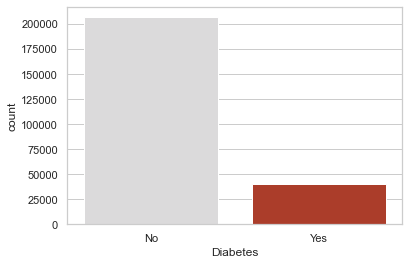

In [ ]:
sns.countplot(x = df['Diabetes'], data=df, palette=['#DBDADB', '#C12E14'])
plt.show()

#### Variable average sleeping time in 24 hours

In [ ]:
df['Sleep'] = pd.cut(df['SleepTime'], bins=[0,6,9,24], labels = ['NotEnough', 'Normal', 'OverSleep'])

In [ ]:
tab = pd.crosstab(df['Diabetes'],df['Sleep'])
tab

Sleep,NotEnough,Normal,OverSleep
Diabetes,,,
No,63856,136854,6194
Yes,14256,23054,2473


In [ ]:
oddS1, pvalueS1 = stats.fisher_exact([[14256, 23054], [63856, 136854]])
oddS2, pvalueS2 = stats.fisher_exact([[2473, 23054], [6194, 136854]])

In [ ]:
print('oddS1=%.3f, pvalueS1=%.3f, oddS2=%.3f, pvalueS2=%.3f' % (oddS1, pvalueS1, oddS2, pvalueS2))

oddS1=1.325, pvalueS1=0.000, oddS2=2.370, pvalueS2=0.000


##### Interpreting the odds ratio and p-values
- The odds of type 2 Diabetes are 1.325 times higher in the NotEnough sleeper (6 hour or less) than compared to a Normal sleeper (7 to 9 hours).
- The odds of type 2 Diabetes are 2.37 times higher in Over sleeper (10 or more hours) than  compared to a Normal sleeper.
- All p-values are asignificant level 0.05.

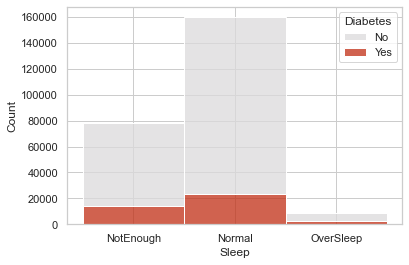

In [ ]:
sns.histplot(data=df, x="Sleep", hue="Diabetes", multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

#### Variable age group of the subject

In [ ]:
df['AgeGrp'] = pd.cut(df['AgeGrp'], [2, 4, 6, 8, 10, 12, 13], labels = ['Thirties', 'Fourties', 'Fifties','Sixties', 'Seventies', 'Eighties & up']) 

In [ ]:
agr = pd.crosstab(df['Diabetes'],df['AgeGrp'])
agr

AgeGrp,Thirties,Fourties,Fifties,Sixties,Seventies,Eighties & up
Diabetes,,,,,,
No,17971,36593,47940,53618,35005,15777
Yes,783,3411,7955,13069,10667,3898


In [ ]:
oddA1, pvalueA1 = stats.fisher_exact([[3411, 783], [36593, 17971]])
oddA2, pvalueA2 = stats.fisher_exact([[7955, 783], [47940, 17971]])
oddA3, pvalueA3 = stats.fisher_exact([[13069, 783], [53618, 17971]])
oddA4, pvalueA4 = stats.fisher_exact([[10667, 783], [35005, 17971]])
oddA5, pvalueA5 = stats.fisher_exact([[3898, 783], [15777, 17971]])

In [ ]:
print('oddA1=%.3f, pvalueA1=%.3f, oddA2=%.3f, pvalueA2=%.3f, oddA3=%.3f, pvalueA3=%.3f, oddA4=%.3f, pvalueA4=%.3f, oddA5=%.3f, pvalue=%.3f'
 % (oddA1, pvalueA1, oddA2, pvalueA2, oddA3, pvalueA3, oddA4, pvalueA4, oddA5, pvalueA5))

oddA1=2.139, pvalueA1=0.000, oddA2=3.808, pvalueA2=0.000, oddA3=5.594, pvalueA3=0.000, oddA4=6.994, pvalueA4=0.000, oddA5=5.671, pvalue=0.000


##### Interpreting the odds ratio and p-values 
- The odds of Type 2 Diabetes are 2.139 times higher in the Fourties  than in the Thirties.
- The odds of Type 2 Diabetes are 3.808 times higher in the Fifties  than in the Thirties.
- The odds of Type 2 Diabetes are 5.594 times higher in the Sixtties  than in the Thirties.
- The odds of Type 2 Diabetes are 6.994 times higher in the Seventies  than in the Thirties.
- The odds of Type 2 Diabetes are 5.671 times higher in the Eighties & Up  than in the Thirties.

- All p-values are significant.

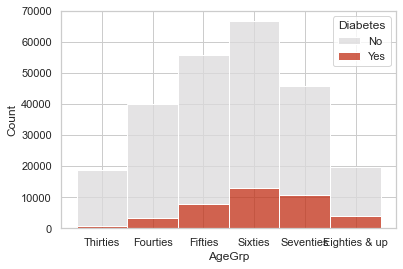

In [ ]:
sns.histplot(data=df, x="AgeGrp", hue="Diabetes", multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

#### Variable asking if the subject has health coverage

In [ ]:
df['Insurance'] = pd.cut(df['Insurance'], [0, 1, 2], labels= ['Coverage', 'NoCoverage'])

In [ ]:
Dlr = pd.crosstab(df['Diabetes'],df['Insurance'])
Dlr

Insurance,Coverage,NoCoverage
Diabetes,,
No,194220,12684
Yes,38078,1705


In [ ]:
oddIns, pvalueIns = stats.fisher_exact([[38078, 1705], [194220, 12684]])
print('oddIns=%.3f, pvalueIns=%.3f' % (oddIns, pvalueIns))

oddIns=1.459, pvalueIns=0.000


##### The odds of Type 2 Diabetes are 1.459 times are higher in people with coverage than people without coverage and the difference is signicant because p-value is less than 0.05

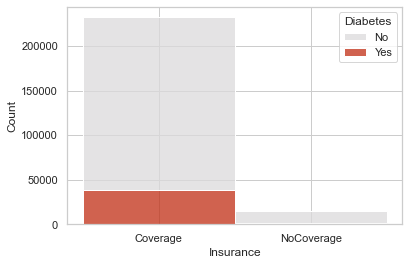

In [ ]:
sns.histplot(data=df, x="Insurance", hue="Diabetes", multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

#### Variable how long since you have a routine check up

In [ ]:
df['LastVCat'] = pd.cut(df['TimeLastVDr'], bins = [0, 1, 2, 9], labels = ['Within a year', 'Within 2 years', 'Within 3 & up'])

In [ ]:
pd.crosstab(df['Diabetes'],df['LastVCat'])

LastVCat,Within a year,Within 2 years,Within 3 & up
Diabetes,,,
No,167477,20153,19274
Yes,37893,1186,704


In [ ]:
oddCk1, pvalueCk1 = stats.fisher_exact([[37893, 704], [167477, 19274]])
oddCk2, pvalueCk2 = stats.fisher_exact([[1186, 704], [20153, 19274]])
print('oddCk1=%.3f, pvalueCk1=%.3f, oddCk2=%.3f, pvalueCk2=%.3f' % (oddCk1, pvalueCk1, oddCk2, pvalueCk2))

oddCk1=6.194, pvalueCk1=0.000, oddCk2=1.611, pvalueCk2=0.000


##### Interpreting the odds ratio and p-values
- The odds of Type 2 Diabetes are 6.194 times higher in people who had a routine checkup within a year than people within 3 years and up.
- The odds of Type 2 Diabetes are 1.611 times higher in people who had a routine checkup between 1 and 2 years than people within 3 years and up.
- All p-values are significant. 

##### We can constate that the longer the time since you have a routine check up, the lower are the odds of Type 2 Diabetes.

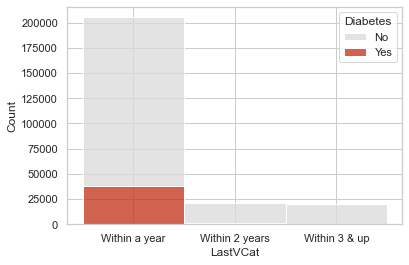

In [ ]:
sns.histplot(data=df, x="LastVCat", hue="Diabetes", multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

#### Variable because of a physical, mental, or emotional condition, do you have serious difficulty concentrating, remembering, or making decisions

In [ ]:
df['Focused'] = pd.cut(df['Focused'], bins = [0, 1, 2], labels = ['Yes', 'No'])

In [ ]:
pd.crosstab(df['Diabetes'], df['Focused'])

Focused,Yes,No
Diabetes,,
No,16815,190089
Yes,6133,33650


In [ ]:
oddF, pvalueF = stats.fisher_exact([[6133, 33650], [16815, 190089]])
print('oddF=%.3f, pvalueF=%.3f' % (oddF, pvalueF))

oddF=2.060, pvalueF=0.000


##### The odds of type 2 Diabetes are 2.06 times higher in people who have serious difficulty concentrating, remembering, or making decisions than people without it.  

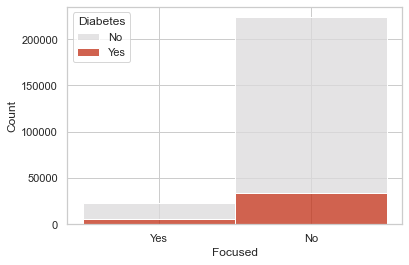

In [ ]:
sns.histplot(data = df, x = 'Focused', hue = 'Diabetes', multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

#### Variable now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?

In [ ]:
df['PhysicalHealth'] = pd.cut(df['PhysicalHealth'], bins = [0, 1, 2, 3], labels = ['0 Bad days', '1-13 Bad days', '14+ Bad days'])

In [ ]:
pd.crosstab(df['Diabetes'], df['PhysicalHealth'])

PhysicalHealth,0 Bad days,1-13 Bad days,14+ Bad days
Diabetes,,,
No,135702,46613,24589
Yes,18919,10288,10576


In [ ]:
oddPh1, pvaluePh1 = stats.fisher_exact([[10288, 18919], [46613, 135702]])
oddPh2, pvaluePh2 = stats.fisher_exact([[10576, 18919], [24589, 135702]])
print('oddPh1=%.3f, pvaluePh1=%.3f, oddPh2=%.3f, pvaluePh2=%.3f' % (oddPh1, pvaluePh1, oddPh2, pvaluePh2))

oddPh1=1.583, pvaluePh1=0.000, oddPh2=3.085, pvaluePh2=0.000


##### Interpreting the odds ratio and p-values
- The odds of Type 2 Diabetes are 1.583 times higher in people who have 1 to 13 bad days of physical health than people who had zero bad day.
- The odds of Type 2 Diabetes are 3.085 times higher in people who have 14 or more bad days of physical health than people who had zero bad day.
- The p-values are significant.

##### What we can get from above is that the higher the number of bad physical health days, the higher are the odds of type 2 Dibetes.

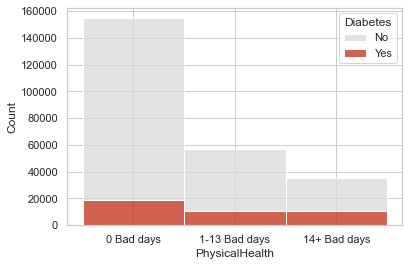

In [ ]:
sns.histplot(data = df, x = 'PhysicalHealth', hue = 'Diabetes', multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

#### Variable gender

In [ ]:
df['Sex'] = pd.cut(df['Sex'], [0, 1, 2], labels = ['Male', 'Female'])

In [ ]:
pd.crosstab(df['Diabetes'], df['Sex'])

Sex,Male,Female
Diabetes,,
No,96222,110682
Yes,20289,19494


In [ ]:
oddS, pvalueS = stats.fisher_exact([[20289, 19494], [96222, 110682]])
print('oddS=%.3f, pvalueS=%.3f' % (oddS, pvalueS))

oddS=1.197, pvalueS=0.000


##### The odds of Type 2 Diabetes are 1.197 times higher in Male than in Female.

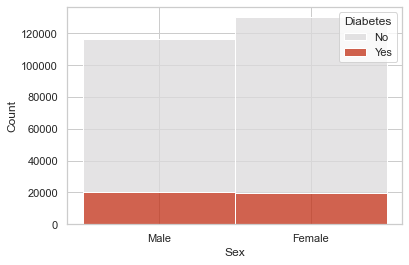

In [ ]:
sns.histplot(data = df, x = 'Sex', hue = 'Diabetes', multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

#### Variable respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

In [ ]:
df['CardioVasc'] = pd.cut(df['CardioVasc'], [0, 1, 2], labels = ['Yes', 'No'])

In [ ]:
pd.crosstab(df['Diabetes'], df['CardioVasc'])

CardioVasc,Yes,No
Diabetes,,
No,16938,189966
Yes,9099,30684


In [ ]:
oddCv, pvalueCv = stats.fisher_exact([[9099, 30684], [16938, 189966]])
print('oddCv=%.3f, pvalueCv=%.3f' % (oddCv, pvalueCv))

oddCv=3.326, pvalueCv=0.000


##### The odds of Type 2 Diabetes are 3.326 times higher in people with cardiovascular disease than people without it.

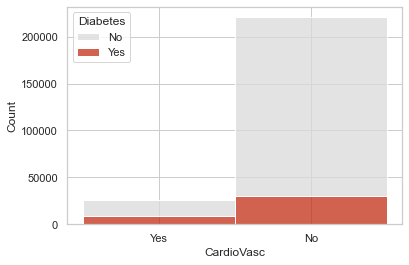

In [ ]:
sns.histplot(data = df, x = 'CardioVasc', hue = 'Diabetes', multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

#### Variable (Ever told) you have kidney disease?

In [ ]:
df['KidneyDis'] = pd.cut(df['KidneyDis'], [0, 1, 2], labels = ['Yes', 'No'])

In [ ]:
pd.crosstab(df['Diabetes'], df['KidneyDis'])

KidneyDis,Yes,No
Diabetes,,
No,6039,200865
Yes,4459,35324


In [ ]:
oddKd, pvalueKd = stats.fisher_exact([[4459, 35324], [6039, 200865]])
print('oddKd=%.3f, pvalueKd=%.3f' % (oddKd, pvalueKd))

oddKd=4.199, pvalueKd=0.000


##### The odds of Type 2 Diabetes are 4.199 times higher in people with kidney disease than people without it.

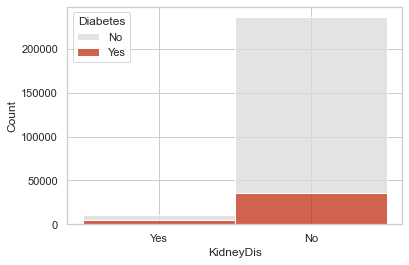

In [ ]:
sns.histplot(data = df, x = 'KidneyDis', hue = 'Diabetes', multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

#### Variable income level

In [ ]:
df['Income'] = pd.cut(df['Income'], bins = [0,  2,  4, 5], labels = ['< $25000', '< $50000', '> $50000'])

In [ ]:
pd.crosstab(df['Diabetes'], df['Income'])

Income,< $25000,< $50000,> $50000
Diabetes,,,
No,41367,47196,118341
Yes,14156,10647,14980


In [ ]:
oddInc1, pvalueInc1 = stats.fisher_exact([[14156, 14980], [41367, 118341]])
oddInc2, pvalueInc2 = stats.fisher_exact([[10647, 14980], [47196, 118341]])
print('oddInc1=%.3f, pvalueInc1=%.3f, oddInc2=%.3f, pvalueInc2=%.3f' % (oddInc1, pvalueInc1, oddInc2, pvalueInc2))

oddInc1=2.703, pvalueInc1=0.000, oddInc2=1.782, pvalueInc2=0.000


##### Interpreting the odds ratio and p-values
* ###### The odds of Type 2 Diabetes are 2.703 times higher in people who have less than 25,000 income level than people who have more than 50,000 income level.
* ###### The odds of Type 2 Diabetes are 1.782 times higher in people who have less than 50,000 income level than people who have more than 50,000 income level.
* ###### All p-values are significant.

##### We see above that the higher is the income, the lower are the odds of Type 2 Diabetes.

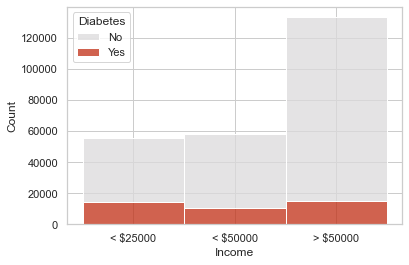

In [ ]:
sns.histplot(data = df, x = 'Income', hue = 'Diabetes', multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

#### Variable Education level

##### Note: I had four categories of Education levels, but after calculating the odds ratio I noticed that there is almost not difference between people who graduated high school or have a GED and people who have some college education but did not graduate, because of it I merge them.

In [ ]:
df['EducationLevel'] = pd.cut(df['EducationLevel'], bins = [0,  3, 5, 6], labels = ['No HS or GED', 'HS-GED or Some College', 'College Grad+'])

In [ ]:
pd.crosstab(df['Diabetes'], df['EducationLevel'])

EducationLevel,No HS or GED,HS-GED or Some College,College Grad+
Diabetes,,,
No,10567,105533,90804
Yes,3755,24109,11919


In [ ]:
oddEd1, pvalueEd1 = stats.fisher_exact([[3755, 11919], [10567, 90804]])
oddEd3, pvalueEd3 = stats.fisher_exact([[24109, 11919], [105533, 90804]])
print('oddEd1=%.3f, pvalueEd1=%.3f, oddEd3=%.3f, pvalueEd3=%.3f' % (oddEd1, pvalueEd1,  oddEd3, pvalueEd3))

oddEd1=2.707, pvalueEd1=0.000, oddEd3=1.740, pvalueEd3=0.000


##### Interpreting the odds ratio and p-values
* ###### The odds of Type 2 Diabetes are 2.707 times higher in people who did not graduate High school or not have GED than in people who graduated college.
* ###### The odds of Type 2 Diabetes are 1.740 times higher in people who graduated High school or have GED or have some college education than in people who graduated college.
* ###### All p-values are significant.

##### We can see from these odds ratio that the lower the level of education, the higher are the odds of type 2 Diabetes.

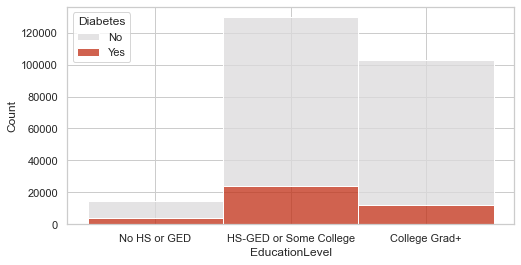

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data = df, x = 'EducationLevel', hue = 'Diabetes', multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

#### Variable Would you say that in general your health is:

In [ ]:
df['GenHealth']=pd.cut(df['GenHealth'], bins = [0, 1, 2], labels = ['Good or Better', 'Fair or Poor'])

In [ ]:
pd.crosstab(df['Diabetes'], df['GenHealth'])

GenHealth,Good or Better,Fair or Poor
Diabetes,,
No,177132,29772
Yes,23835,15948


In [ ]:
oddGh, pvalueGh = stats.fisher_exact([[15948, 23835], [29772, 177132]])
print('oddGh=%.3f, pvalueGh=%.3f' % (oddGh, pvalueGh))

oddGh=3.981, pvalueGh=0.000


##### The odds of Type 2 Diabetes are 3.981 (almost 4) times higher in people with general health Fair or Poor than in people with general health Good or Better

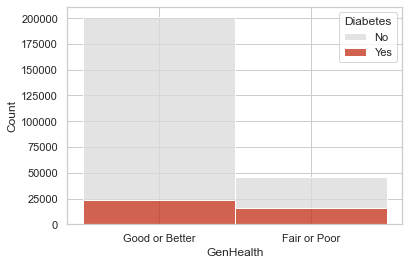

In [ ]:
sns.histplot(data = df, x = 'GenHealth', hue = 'Diabetes', multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

#### Variable was there a time in the past 12 months when you needed to see a doctor but could not because of cost?

In [ ]:
df['MedAffordability'] = pd.cut(df['MedAffordability'], [0, 1, 2], labels = ['Afford', 'NotAfford'])

In [ ]:
pd.crosstab(df['Diabetes'], df['MedAffordability'])

MedAffordability,Afford,NotAfford
Diabetes,,
No,17159,189745
Yes,4171,35612


In [ ]:
oddMd, pvalueMd = stats.fisher_exact([[4171,35612], [17159, 189745]])
print('oddMd=%.3f, pvalueMd=%.3f' % (oddMd, pvalueMd))

oddMd=1.295, pvalueMd=0.000


##### The odds of Type 2 Diabetes are 1.295 times higher in people who could afford to see doctor than people who could not see a doctor because of cost.

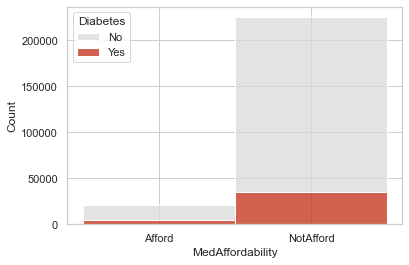

In [ ]:
sns.histplot(data = df, x = 'MedAffordability', hue = 'Diabetes', multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

#### Variable Race

In [ ]:
df['Race'] = pd.cut(df['Race'], [0, 1, 2, 3, 4, 5, 6], labels = ['White', 'Black', 'Asian', 'Native A', 'Hispanic', 'Other'])

In [ ]:
pd.crosstab(df['Diabetes'], df['Race'])

Race,White,Black,Asian,Native A,Hispanic,Other
Diabetes,,,,,,
No,170454,14320,3370,3079,10385,5296
Yes,29426,4774,725,1146,2449,1263


In [ ]:
oddWb, pvalueWb = stats.fisher_exact([[4747, 29426], [14320, 170454]])
oddWa, pvalueWa = stats.fisher_exact([[725, 29426], [3370,170454]])
oddWn, pvalueWn = stats.fisher_exact([[1146, 29426], [3079, 170454]])
oddWh, pvalueWh = stats.fisher_exact([[2449, 29426], [10385, 170454]])
oddWo, pvalueWo = stats.fisher_exact([[1263, 29426], [5296, 170454]])
print('oddWb=%.3f, pvalueWb=%.3f, oddWa=%.3f, pvalueWa=%.3f, oddWn=%.3f, pvalueWn=%.3f, oddWh=%.3f, pvalueWh=%.3f, oddWo=%.3f, pvalueWo=%.3f'
 % (oddWb, pvalueWb, oddWa, pvalueWa, oddWn, pvalueWn, oddWh, pvalueWh, oddWo, pvalueWo))

oddWb=1.920, pvalueWb=0.000, oddWa=1.246, pvalueWa=0.000, oddWn=2.156, pvalueWn=0.000, oddWh=1.366, pvalueWh=0.000, oddWo=1.381, pvalueWo=0.000


##### Interpreting the odds ratio and p-values
* ###### The odds of Type 2 Diabetes are 1.92 (almost 2) times higher in Black than in White.
* ###### The odds of Type 2 Diabetes are 1.246 times higher in Asian than in White.
* ###### The odds of Type 2 Diabetes are 2.156 times higher in Native American than in White.
* ###### The odds of Type 2 Diabetes are 1.355 times higher in Hispanic than in White.
* ###### The odds of Type 2 Diabetes are 1.381 times higher in Other race Non-Hispanic than in White.
* ###### All p-value are significant.

##### For the purpose of dimension reduction and modeling 
- I'll merge Black and Native American, because their odds are close.
- I'll merge Hispanic and other races, because their are almost the same.

In [ ]:
df['Race'] = np.where((df.Race == 'Black'), 'Black or Native',df.Race)
df['Race'] = np.where((df.Race == 'Native A'), 'Black or Native',df.Race)
df['Race'] = np.where((df.Race == 'Hispanic'), 'Hispanic or Other',df.Race)
df['Race'] = np.where((df.Race == 'Other'), 'Hispanic or Other',df.Race)

In [ ]:
pd.crosstab(df['Diabetes'], df['Race'])

Race,Asian,Black or Native,Hispanic or Other,White
Diabetes,,,,
No,3370,17399,15681,170454
Yes,725,5920,3712,29426


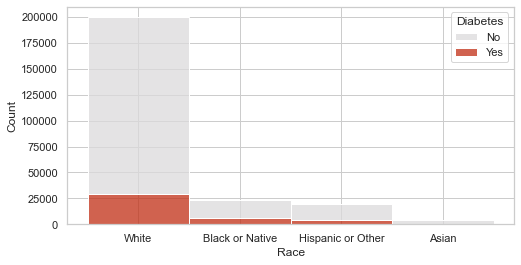

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data = df, x = 'Race', hue = 'Diabetes', multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

#### Variable BMI category

In [ ]:
df['BMI'] = pd.cut(df['BMICategory'], [0, 1, 2, 3, 4], labels = ['Under weight', 'Normal', 'Over Weight', 'Obese'])

In [ ]:
pd.crosstab(df['Diabetes'], df['BMI'])

BMI,Under weight,Normal,Over Weight,Obese
Diabetes,,,,
No,2932,63445,79433,61094
Yes,193,5092,12453,22045


In [ ]:
oddBu, pvalueBu = stats.fisher_exact([[193,5092], [2932, 63445]])
oddBo, pvalueBo = stats.fisher_exact([[12453, 5092], [79433, 63445]])
oddBO, pvalueBO = stats.fisher_exact([[22045, 5092], [61094, 63445]])
print('oddBu=%.3f, pvalueBu=%.3f, oddBo=%.3f, pvalueBo=%.3f, oddBO=%.3f, pvalueBO=%.3f' % (oddBu, pvalueBu, oddBo, pvalueBo, oddBO, pvalueBO))

oddBu=0.820, pvalueBu=0.009, oddBo=1.953, pvalueBo=0.000, oddBO=4.496, pvalueBO=0.000


##### Interpreting the odds ratio and p-values
* ###### The odds of Type 2 Diabetes are 0.82 times lower in people with Under Weight than people with Normal Weight.
* ###### The odds of Type 2 Diabetes are 1.953 (almost 2) times higher in Over Weight people than people with Normal Weight.
* ###### The odds of Type 2 Diabetes are 4.496 (almost 4.5) times higher in Obese people than people with Normal Weight.
* ###### All p-values are significant.

##### What we can see by these odds ratio, is that the higher the BMI, the higher are the odds of Type 2 Diabetes.

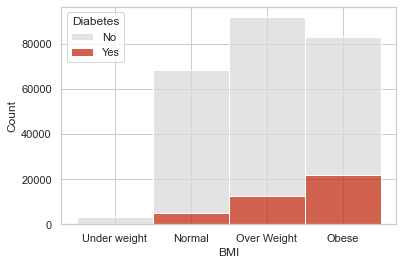

In [ ]:
sns.histplot(data = df, x = 'BMI', hue = 'Diabetes', multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

#### Variable Marital Status

In [ ]:
df['MaritalStatus'] = pd.cut(df['MaritalStatus'], [0, 1, 2, 3, 4, 5,6], labels = ['Married', 'Divorced', 'Widowed', 'Separated', 'NeverMarried', 'UnMarriedC'])

In [ ]:
pd.crosstab(df['Diabetes'], df['MaritalStatus'])

MaritalStatus,Married,Divorced,Widowed,Separated,NeverMarried,UnMarriedC
Diabetes,,,,,,
No,122699,32338,23836,4050,19094,4887
Yes,20281,6978,6939,1047,3832,706


In [ ]:
oddMd, pvalueMd = stats.fisher_exact([[6978, 20281], [32338, 122699]])
oddMw, pvalueMw = stats.fisher_exact([[6939, 20281], [23836, 122699]])
oddMs, pvalueMs = stats.fisher_exact([[1047, 20281], [4050, 122699]])
oddMn, pvalueMn = stats.fisher_exact([[3832, 20281], [19094, 122699]])
oddMu, pvalueMu = stats.fisher_exact([[706, 20281], [4887, 122699]])
print('oddMd=%.3f, pvalueMd=%.3f, oddMw=%.3f, pvalueMw=%.3f, oddMs=%.3f, pvalueMs=%.3f, oddMn=%.3f, pvalueMn=%.3f, oddMu=%.3f, pvalueMu=%.3f'
 % (oddMd, pvalueMd, oddMw, pvalueMw, oddMs, pvalueMs, oddMn, pvalueMn, oddMu, pvalueMu))

oddMd=1.305, pvalueMd=0.000, oddMw=1.761, pvalueMw=0.000, oddMs=1.564, pvalueMs=0.000, oddMn=1.214, pvalueMn=0.000, oddMu=0.874, pvalueMu=0.001


##### Interpreting the odds ratio and p-values
* ###### The odds of Type 2 Diabetes are 1.305 times higher in Divorcee than in Married.
* ###### The odds of Type 2 Diabetes are 1.761 times higher in Widowed than in Married.
* ###### The odds of Type 2 Diabetes are 1.564 times higher in Separated than in Married.
* ###### The odds of Type 2 Diabetes are 1.214 times higher in Never Married than in Married.
* ###### The odds of Type 2 Diabetes are 0.874 times lower in Unmarried couple than in Married.
* ###### All p-values are significant.

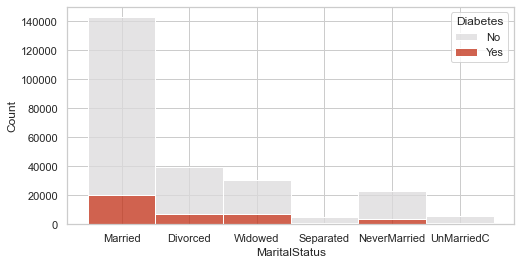

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data = df, x = 'MaritalStatus', hue = 'Diabetes', multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

#### Variable Flushot

In [ ]:
df['Flushot'] = pd.cut(df['Flushot'] , [0, 1, 2], labels = ['Yes', 'No'])

In [ ]:
pd.crosstab(df['Diabetes'], df['Flushot'])

Flushot,Yes,No
Diabetes,,
No,84693,122211
Yes,20494,19289


In [ ]:
oddF, pvalueF = stats.fisher_exact([[20494, 19289], [84693, 122211]])
print('oddF=%.3f, pvalueF=%.3f' % (oddF, pvalueF))

oddF=1.533, pvalueF=0.000


##### The odds of Type 2 Diabetes are 1.533 higher in people who got Flushot than people who did not.

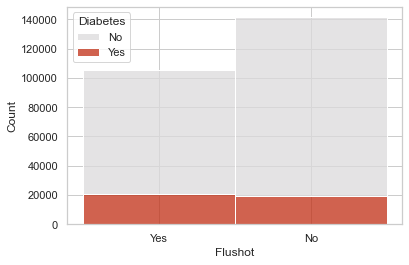

In [ ]:
sns.histplot(data = df, x = 'Flushot', hue = 'Diabetes', multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

#### Variable about Employment Status

In [ ]:
df['Employment'] = pd.cut(df['Employment'], [0, 1, 2, 4, 5, 6, 7, 8], labels = ['Wages', 'SelfE', 'Unemployed','Homemaker', 'Student', 'Retired', 'Unable'])

In [ ]:
pd.crosstab(df['Diabetes'], df['Employment'])

Employment,Wages,SelfE,Unemployed,Homemaker,Student,Retired,Unable
Diabetes,,,,,,,
No,90397,22435,6185,8515,773,66221,12378
Yes,10042,2388,1282,1308,74,18527,6162


In [ ]:
oddEs, pvalueEs = stats.fisher_exact([[2388, 10042], [22435, 90397]])
oddEu, pvalueEu = stats.fisher_exact([[1282, 10042], [6185, 90397]])
oddEh, pvalueEh = stats.fisher_exact([[1308, 10042], [8515, 90397]])
oddEst, pvalueEst = stats.fisher_exact([[74, 10042], [773, 90397]])
oddEr, pvalueEr = stats.fisher_exact([[18527, 10042], [66221, 90397]])
oddEu1, pvalueEu1 = stats.fisher_exact([[6162, 10042], [12378, 90397]])

print('oddEs=%.3f, pvalueEs=%.3f, oddEu=%.3f, pvalueEu=%.3f, oddEh=%.3f, pvalueEh=%.3f, oddEst=%.3f, pvalueEst=%.3f, oddEr=%.3f, pvalueEr=%.3f, oddEu1=%.3f, pvalueEu1=%.3f'
 % (oddEs, pvalueEs, oddEu, pvalueEu, oddEh, pvalueEh, oddEst, pvalueEst, oddEr, pvalueEr, oddEu1, pvalueEu1))

oddEs=0.958, pvalueEs=0.075, oddEu=1.866, pvalueEu=0.000, oddEh=1.383, pvalueEh=0.000, oddEst=0.862, pvalueEst=0.249, oddEr=2.519, pvalueEr=0.000, oddEu1=4.481, pvalueEu1=0.000


##### Interpreting the odds ratio and p-value
* ###### There is no difference of odds of Type 2 Diabetes between Self-Emplyed and Emplyed with wage because the p-value is not significant 0.075 greater than 0.05.
* ###### The odds of Type 2 Diabetes are 1.866 times higher in Unemployed than employed with wage.
* ###### The odds of Type 2 Diabetes are 1.383 times higher in Homemaker than employed with wage.
* ###### The odds of Type 2 Diabetes are 0.862 times lower in Student than employed with wage, but because the p-value is not significant 0.249 greater than 0.05 the difference is not significant or important.
* ###### The odds of Type 2 Diabetes are 2.519 times higher in Retired than employed with wage.
* ###### The odds of Type 2 Diabetes are 4.481 times higher in the Unable than employed with wage.

##### For the purpose of modeling and reduce complexity, I will merge Wages, SelfE, and Student because their p-values are not significant

In [ ]:
df['Employment'] = np.where((df.Employment == 'Wages'), 'Working or Student',df.Employment)
df['Employment'] = np.where((df.Employment == 'SelfE'), 'Working or Student',df.Employment)
df['Employment'] = np.where((df.Employment == 'Student'), 'Working or Student',df.Employment)

In [ ]:
pd.crosstab(df['Diabetes'], df['Employment'])

Employment,Homemaker,Retired,Unable,Unemployed,Working or Student
Diabetes,,,,,
No,8515,66221,12378,6185,113605
Yes,1308,18527,6162,1282,12504


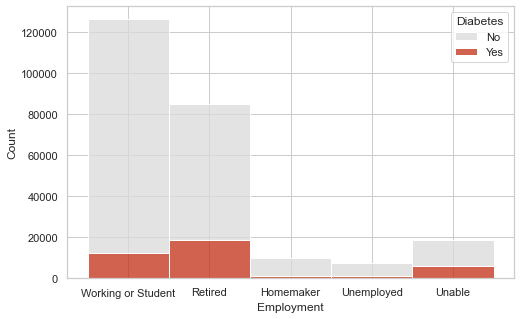

In [ ]:
plt.figure(figsize = (8, 5))
sns.histplot(data = df, x = 'Employment', hue = 'Diabetes', multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

#### Variable Depression

In [ ]:
df['Depression'] = pd.cut(df['Depression'], [0, 1, 2], labels = ['Yes', 'No'])

In [ ]:
pd.crosstab(df['Diabetes'], df['Depression'])

Depression,Yes,No
Diabetes,,
No,35544,171360
Yes,9929,29854


In [ ]:
oddDp, pvalueDp = stats.fisher_exact([[9929, 29854], [35584, 171360]])
print('oddDp=%.3f, pvalueDp=%.3f' % (oddDp, pvalueDp))

oddDp=1.602, pvalueDp=0.000


##### The odds of Type 2 Diabetes are 1.602 times higher in people with Depression than people without it.

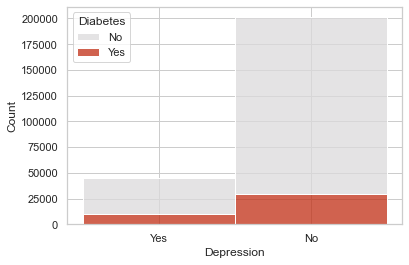

In [ ]:
sns.histplot(data = df, x = 'Depression', hue = 'Diabetes', multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

##### Variable about housing situation

In [ ]:
df['Housing'] = pd.cut(df['Housing'], [0, 1, 2, 3], labels = ['Own', 'Rent', 'Other'])

In [ ]:
pd.crosstab(df['Diabetes'], df['Housing'])

Housing,Own,Rent,Other
Diabetes,,,
No,167252,35178,4474
Yes,29498,8978,1307


In [ ]:
oddHr, pvalueHr = stats.fisher_exact([[8978, 29498], [35178, 167252]])
oddHo, pvalueHo = stats.fisher_exact([[1307, 29498], [4474, 167252]])
print('oddHr=%.3f, pvalueHr=%.3f, oddHo=%.3f, pvalueHo=%.3f' % (oddHr, pvalueHr, oddHo, pvalueHo))

oddHr=1.447, pvalueHr=0.000, oddHo=1.656, pvalueHo=0.000


##### Interpreting the odds ratio and p-values
* ###### The odds of Type 2 Diabetes are 1.447 times higher in people who rent than in people who own their houses.
* ###### The odds of Type 2 Diabetes are 1.656 times higher in people who housing situation is other than in people who own their houses.
* ###### All p-values are significant.

I will combine Rent and Other

In [ ]:
df['Housing'] = np.where((df.Housing == 'Rent'), 'Rent or Other',df.Housing)
df['Housing'] = np.where((df.Housing == 'Other'), 'Rent or Other',df.Housing)

In [ ]:
pd.crosstab(df['Diabetes'], df['Housing'])

Housing,Own,Rent or Other
Diabetes,,
No,167252,39652
Yes,29498,10285


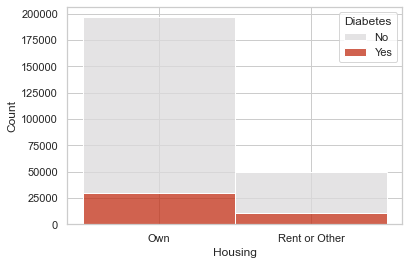

In [ ]:
sns.histplot(data = df, x = 'Housing', hue = 'Diabetes', multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

##### Variable did you participate in physical activity 

In [ ]:
df['PartExercise'] = pd.cut(df['PartExercise'],[0, 1, 2],  labels = ['Yes', 'No'])

In [ ]:
pd.crosstab(df['Diabetes'], df['PartExercise'])

PartExercise,Yes,No
Diabetes,,
No,161667,45237
Yes,24814,14969


In [ ]:
oddPe, pvaluePe = stats.fisher_exact([[14969, 24814], [45237, 161667]])
print('oddPe=%.3f, pvaluePe=%.3f' % (oddPe, pvaluePe))

oddPe=2.156, pvaluePe=0.000


##### The odds of Type 2 Diabetes are 2.156 times higher in people who didn't participate in physical activity than in people who did.

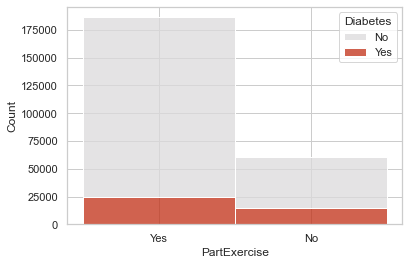

In [ ]:
sns.histplot(data = df, x = 'PartExercise', hue = 'Diabetes', multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

##### Variable are you blind or do you have serious difficulty seeing, even when wearing glasses?

In [ ]:
df['Vision'] = pd.cut(df['Vision'], [0, 1, 2], labels = ['Yes', 'No'])

In [ ]:
pd.crosstab(df['Diabetes'], df['Vision'])

Vision,Yes,No
Diabetes,,
No,8804,198100
Yes,3844,35939


In [ ]:
oddV, pvalueV = stats.fisher_exact([[3844, 35939], [8804, 198100]])
print('oddV=%.3f, pvalueV=%.3f' % (oddV, pvalueV))

oddV=2.407, pvalueV=0.000


##### The odds of Type 2 Diabetes are 2.407 higher in people who have serious difficulty seeing than people who did not.

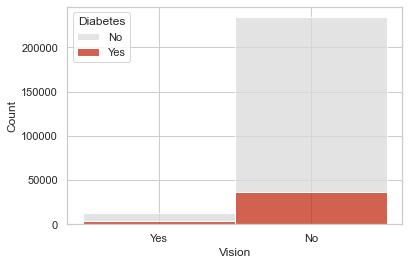

In [ ]:
sns.histplot(data = df, x = 'Vision', hue = 'Diabetes', multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

##### Variable about smoking

In [ ]:
df['Smoke'] = pd.cut(df['Smoke'], [0, 1, 2, 3, 4], labels = ['Smoke daily', 'Smoke some days', 'Quit', 'Never Smoke'])

In [ ]:
pd.crosstab(df['Diabetes'], df['Smoke'])

Smoke,Smoke daily,Smoke some days,Quit,Never Smoke
Diabetes,,,,
No,21483,8058,63791,113572
Yes,4056,1408,14782,19537


In [ ]:
oddSd, pvalueSd = stats.fisher_exact([[4056, 19537], [21483, 113572]])
oddSq, pvalueSq = stats.fisher_exact([[1408, 19537], [8058, 113572]])
oddSn, pvalueSn = stats.fisher_exact([[14782, 19537], [63791, 113572]])

print('oddSd=%.3f, pvalueSd=%.3f, oddSq=%.3f, pvalueSq=%.3f, oddSn=%.3f, pvalueSn=%.3f' % (oddSd, pvalueSd, oddSq, pvalueSq, oddSn, pvalueSn))

oddSd=1.098, pvalueSd=0.000, oddSq=1.016, pvalueSq=0.599, oddSn=1.347, pvalueSn=0.000


##### Interpreting the odds ratio and p-values
* ###### The odds of Type 3 Diabetes are 1.098 times higher in daily smokers than in people who never smoke.
* ###### There is no significant differencs in odds of Type 2 Diabetes between in people who smoke some days and people who never smoke, p-value not significant.
* ###### The odds of type 2 Diabetes are 1.347 times higher in people who Quit smoking than people who never smoke.

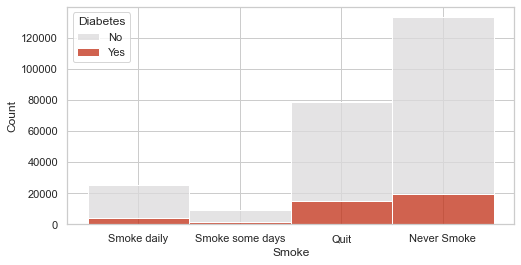

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data = df, x = 'Smoke', hue = 'Diabetes', multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

##### The variable asked Do you have one person you think of as your personal doctor or health care provider?

In [ ]:
df['PCP'] = pd.cut(df['PCP'], [0, 2, 3], labels = ['Yes', 'No'])

In [ ]:
pd.crosstab(df['Diabetes'], df['PCP'])

PCP,Yes,No
Diabetes,,
No,179866,27038
Yes,37732,2051


In [ ]:
oddPcp, pvaluePcp = stats.fisher_exact([[37732, 2051], [179866, 27038]])

print('oddPcp=%.3f, pvaluePcp=%.3f' % (oddPcp, pvaluePcp))

oddPcp=2.765, pvaluePcp=0.000


##### The odds of Type 2 Diabetes are 2.765 times higher in people who have a primary care physician than people who did not have one.

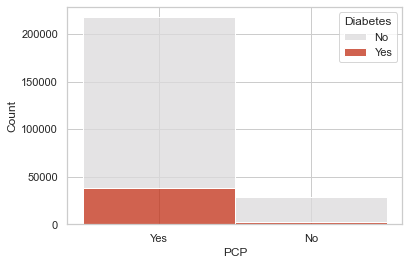

In [ ]:
sns.histplot(data = df, x = 'PCP', hue = 'Diabetes', multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

##### The variable Stroke

In [ ]:
df['Stroke'] = pd.cut(df['Stroke'], [0, 1, 2], labels = ['Yes', 'No'])

In [ ]:
pd.crosstab(df['Diabetes'], df['Stroke'])

Stroke,Yes,No
Diabetes,,
No,7670,199234
Yes,3968,35815


In [ ]:
oddStr, pvalueStr = stats.fisher_exact([[3968, 35815], [7670, 199234]])

print('oddStr=%.3f, pvalueStr=%.3f' % (oddStr, pvalueStr))

oddStr=2.878, pvalueStr=0.000


##### The odds of Type 2 Diabetes are 2.878 times higher in people who had stroke than people who did not.

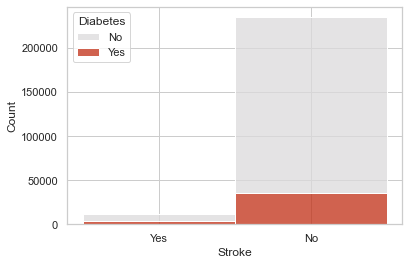

In [ ]:
sns.histplot(data = df, x = 'Stroke', hue = 'Diabetes', multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

##### The variable about teeth removed

In [ ]:
df['RmTeeth'] = pd.cut(df['RmTeeth'], [0, 1, 2, 3, 8], labels = ['1 to 5', '6 or more', 'All', 'None'])

In [ ]:
pd.crosstab(df['Diabetes'], df['RmTeeth'])

RmTeeth,1 to 5,6 or more,All,None
Diabetes,,,,
No,65081,24457,12742,104624
Yes,13464,8540,5369,12410


In [ ]:
oddRm1, pvalueRm1 = stats.fisher_exact([[13464, 12410], [65081, 104624]])
oddRm2, pvalueRm2 = stats.fisher_exact([[8540, 12410], [24457, 104624]])
oddRm3, pvalueRm3 = stats.fisher_exact([[5369, 12410], [12742, 104624]])

print('oddRm1=%.3f, pvalueRm1=%.3f, oddRm2=%.3f, pvalueRm2=%.3f, oddRm3=%.3f, pvalueRm3=%.3f' % (oddRm1, pvalueRm1, oddRm2, pvalueRm2, oddRm3, pvalueRm3))

oddRm1=1.744, pvalueRm1=0.000, oddRm2=2.944, pvalueRm2=0.000, oddRm3=3.552, pvalueRm3=0.000


##### Interpreting the odds ratio and p-values
* ###### The odds of Type 2 Diabetes are 1.744 times higher in people who removed 1 to 5 teeth than people who removed none.
* ###### The odds of Type 2 Diabetes are 2.944 (almost 3) times higher in people who removed 6 to not all teeth than people who removed none.
* ###### The odds of Type 2 Diabetes are 3.55e times higher in people who removed all teeth than people who removed none.
* ###### All p-values are significant.

##### We can see from above that the higher the number of removed teeth, the higher are the odds of Type 2 Diabetes.

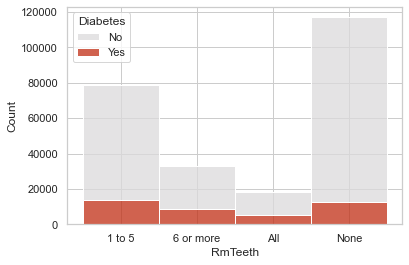

In [ ]:
sns.histplot(data = df, x = 'RmTeeth', hue = 'Diabetes', multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

##### Variable about Metropolitan status

In [ ]:
df['Metrop'] = pd.cut(df['Metrop'], [0, 1, 2], labels = ['Yes', 'No'])

In [ ]:
pd.crosstab(df['Diabetes'], df['Metrop'])

Metrop,Yes,No
Diabetes,,
No,140618,66286
Yes,26032,13751


In [ ]:
oddMet, pvalueMet = stats.fisher_exact([[13751, 26032], [66286, 140618]])

print('oddMet=%.3f, pvalueMet=%.3f' % (oddMet, pvalueMet))

oddMet=1.121, pvalueMet=0.000


##### The odds of Type 2 Diabetes are 1.121 higher in Metropolitan area than not.

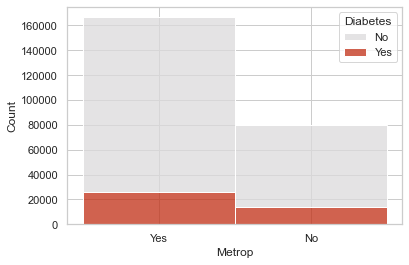

In [ ]:
sns.histplot(data = df, x = 'Metrop', hue = 'Diabetes', multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

##### Variable Asthma

In [ ]:
df['Asthma'] = pd.cut(df['Asthma'], [0, 1, 2], labels = ['No', 'Yes'])

In [ ]:
pd.crosstab(df['Diabetes'], df['Asthma'])

Asthma,No,Yes
Diabetes,,
No,181534,25370
Yes,32518,7265


In [ ]:
oddAs, pvalueAs = stats.fisher_exact([[7265, 32518], [25370, 181534]])

print('oddAs=%.3f, pvalueAs=%.3f' % (oddAs, pvalueAs))

oddAs=1.599, pvalueAs=0.000


##### The odds of Type 2 Diabetes are 1.599 (almost 1.6) times higher in people who have Asthma than people who did not.

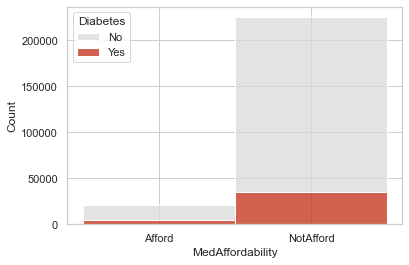

In [ ]:
sns.histplot(data = df, x = 'MedAffordability', hue = 'Diabetes', multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

##### The variable COPD

In [ ]:
df['COPD'] = pd.cut(df['COPD'], [0, 1, 2], labels = ['Yes', 'No'])

In [ ]:
pd.crosstab(df['Diabetes'], df['COPD'])

COPD,Yes,No
Diabetes,,
No,16423,190481
Yes,6473,33310


In [ ]:
oddCo, pvalueCo = stats.fisher_exact([[6473, 33310], [16423, 190481]])

print('oddCo=%.3f, pvalueCo=%.3f' % (oddCo, pvalueCo))

oddCo=2.254, pvalueCo=0.000


##### The odds of Type 2 Diabetes are 2.254 times higher in people with COPD than people who did not.

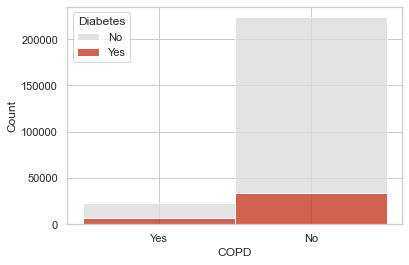

In [ ]:
sns.histplot(data = df, x = 'COPD', hue = 'Diabetes', multiple="stack", palette=['#DBDADB', '#C12E14'])
plt.show()

In [ ]:
df.shape

(246687, 33)

In [ ]:
Type2Df = df[['Focused', 'CardioVasc', 'KidneyDis', 'Sex', 'Race', 'MaritalStatus', 'Insurance', 'MedAffordability', 'Flushot', 'Depression', 'Housing', 'PartExercise', 'COPD',
              'Vision', 'Smoke', 'Employment', 'EducationLevel','Income', 'GenHealth', 'PhysicalHealth','AgeGrp', 'Sleep', 'LastVCat', 'BMI', 'PCP', 'Stroke', 'Asthma', 'RmTeeth',
              'Metrop','Diabetes']]

In [ ]:
Type2Df.shape

(246687, 30)

##### Saving the file to a csv file in order to save all the changes

In [ ]:
Type2Df.to_csv(r'C:\Users\ibrah\Documents\SharpestMind\Type2Diabetes\DiabetesT2.csv', index=False)

In [ ]:
df1 = Type2Df.copy()
df1.head()

,Focused,CardioVasc,KidneyDis,Sex,Race,MaritalStatus,Insurance,MedAffordability,Flushot,Depression,...,AgeGrp,Sleep,LastVCat,BMI,PCP,Stroke,Asthma,RmTeeth,Metrop,Diabetes
0,No,No,No,Female,White,Widowed,Coverage,NotAfford,Yes,No,...,Eighties & up,Normal,Within a year,Normal,Yes,No,No,1 to 5,No,No
2,No,No,No,Female,White,Widowed,Coverage,NotAfford,Yes,Yes,...,Seventies,Normal,Within a year,Over Weight,Yes,Yes,No,None,No,Yes
3,No,No,No,Male,White,Divorced,Coverage,NotAfford,Yes,No,...,Sixties,NotEnough,Within a year,Over Weight,Yes,No,No,1 to 5,Yes,No
6,No,No,No,Female,White,Married,Coverage,NotAfford,Yes,No,...,Seventies,Normal,Within a year,Normal,Yes,No,No,None,Yes,No
8,No,No,No,Male,White,Married,Coverage,NotAfford,No,No,...,Fifties,NotEnough,Within a year,Over Weight,Yes,No,No,None,No,Yes
